# Creating ML pipeline using Automl TPOT

In [2]:
!pip install tpot

     |████████████████████████████████| 87 kB 3.1 MB/s 
     |████████████████████████████████| 173.5 MB 12 kB/s 
     |████████████████████████████████| 160 kB 57.8 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=dc9008d8863d94b5a3aeea0dd48ff1b43404ca43e19bb8eea64c323b53cbbaf8
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [3]:
from tpot import TPOTRegressor

In [4]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('Real_Combine.csv')
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [10]:
df.dropna(inplace=True)

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
print(f'Train shape >> {len(X_train)}')
print(f'Test shape >> {len(X_test)}')

Train shape >> 764
Test shape >> 328


In [16]:
tpot = TPOTRegressor(generations = 10, population_size=50, verbosity=2)
tpot.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1984.6211754349602

Generation 2 - Current best internal CV score: -1672.8226358461397

Generation 3 - Current best internal CV score: -1672.8226358461397

Generation 4 - Current best internal CV score: -1603.8382402001146

Generation 5 - Current best internal CV score: -1576.5827356066873

Generation 6 - Current best internal CV score: -1576.5827356066873

Generation 7 - Current best internal CV score: -1576.5827356066873

Generation 8 - Current best internal CV score: -1576.5827356066873

Generation 9 - Current best internal CV score: -1576.5827356066873

Generation 10 - Current best internal CV score: -1564.914478643211

Best pipeline: KNeighborsRegressor(VarianceThreshold(PolynomialFeatures(RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7000000000000001, min_samples_leaf=1, min_samples_split=9, n_estimators=100), degree=2, include_bias=False, interaction_only=False), threshold=0.1), n_neighbors=77, p=1, weights=di

TPOTRegressor(generations=10, population_size=50, verbosity=2)

In [27]:
automl_pred = tpot.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [28]:
from sklearn import metrics
print(f"R2 Score >> {np.round(metrics.r2_score(y_test,automl_pred),1)*100} % ")

R2 Score >> 90.0 % 


Using TeaPOT autoML, the algorithm found the best model for the data set which is HyperTunned KNeighborsRegressor 

* the Model gave an Accuracy of <B> 90% <B/>


#### The best algorithm and parameters by TPOT

In [29]:
tpot.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=RandomForestRegressor(max_features=0.7000000000000001,
                                                                   min_samples_split=9))),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('variancethreshold', VarianceThreshold(threshold=0.1)),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=77, p=1, weights='distance'))])

### Model Evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


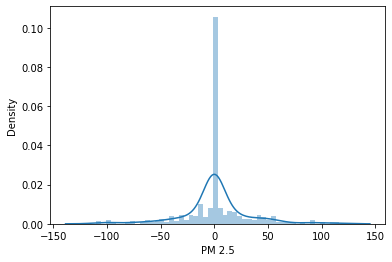

In [30]:
automl_pred = tpot.predict(X_test)
sns.distplot(y_test - automl_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


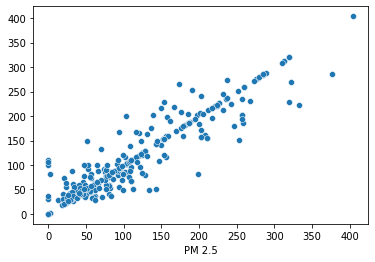

In [31]:
sns.scatterplot(y_test, automl_pred)

In [33]:
from sklearn import metrics
print('MAE > ', metrics.mean_absolute_error(y_test,automl_pred))
print('MSE > ', metrics.mean_squared_error(y_test,automl_pred))
print('RMSE > ', np.sqrt(metrics.mean_squared_error(y_test,automl_pred)))

MAE >  16.919942977191944
MSE >  916.4841370865429
RMSE >  30.2734890140952


In [35]:
tpot.export('tpot_aqi_pipeline.py')